<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-\amily:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Cross-Validation and Regularization
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 3: Topic 24</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

Recall:

Bias: 
- when model not complex enough
- feature space not adequately rich enough to explain target



Variance: 

- model/weights: large fluctuations about true model given different train sets

- High $ \mathrm{Var}[\textbf{w}] $ over realization of training sets

- High fluctuation in MAE over test sets.

The bulls-eye diagrams of fitting model to different training set realizations:
<center><img src = "Images/biasvar_bullseye.png" width = 400/></center>

Each dot is a model:
- Bulls-eye: the *true* model (generating mean of $y$ given $X$ in the population) 
- Each dot: models trained on different samples.

**Our goal**: lowering bias and variance in training predictive models

but the two often at odds.

**Multicollinearity**

Have to grapple with these issues when constructing linear models with multicollinear features

We talked about this way back. But how does it increase Var[$\textbf{w}$]?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

WHO_data = pd.read_csv("Data\WHO_life.csv")
X_WHO = WHO_data.drop(columns = ["Life expectancy "])
X_WHO.columns = X_WHO.columns.str.strip()
y = WHO_data["Life expectancy "]

In [2]:
X_WHO.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Many features from WHO dataset:

Regressing to find weights life expectancy

In [3]:
X_WHO.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

But let's take a look at a few of these and their correlations:

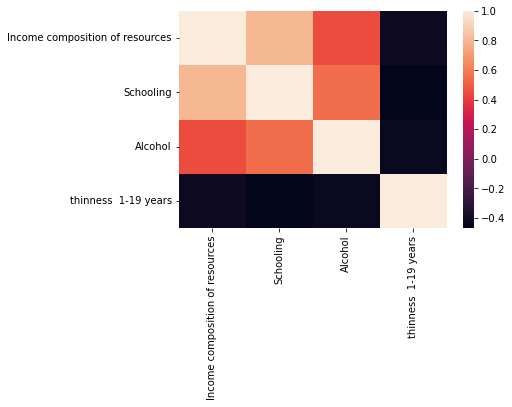

In [5]:
col_selector = ['Income composition of resources', 'Schooling','Alcohol', 'thinness  1-19 years']
subsetX = X_WHO[col_selector]
sns.heatmap(subsetX.corr())
plt.show()

Let's focus on Schooling and income composite resources (ICR):

$$ Life= w_1*Alcohol + w_2*Polio + w_3*Schooling + w_4*Measles + w_5*ICR + ... $$

Correlation is very high!

In [56]:
col_selector = ['Income composition of resources', 'Schooling']
X_WHO[col_selector].corr()

,Income composition of resources,Schooling
Income composition of resources,1.000000,0.800092
Schooling,0.800092,1.000000


Our regression: 
- Y = life expectancy

$$ Y - \sum_{i \neq 3,5} w_i x_i = w_3 Schooling + w_5 ICR $$

- Schooling and ICR highly related:

- Implies that $w_3$ and $w_5$ introduce too much flexibility.
- Maybe could fit almost as well with just $w_3$.

- $w_3$ and $w_5$ are floppy and can become big in either direction to fit data.
- Var[$\textbf{w}$] from $w_3$ and $w_5$ high.

Modeling data by linear model w/ multicollinear features:
- intoduces high weight variance
- unnecessary model complexity

These considerations are all nice and theoretical:
    
- how do we actually assess whether model suffers from bias / variance or both?

#### How to assess model variance: cross-validation

Could get many different training sets:
- Train weights $\textbf{w}$ for each.
- Get variance of $\textbf{w}$


Semi-equivalently:
- Test performance of each model on test set.
- Evaluate model performance/variance by looking at average/standard deviation of performance on test set.

Problem: 
- likely don't have this much data available to make enough independent training sets large enough to for each model to train on effectively.

#### Solution: Cross validation

So first we created our train / test split: 

- the **training set** can be used to develop models
- can assess variance of a model and average performance


<img src = "Images/traintestsplit.png"  width = 800/>
<center> Splitting up training set </center>

<img src = "Images/crossval.png"  width = 800/>
<center> Splitting up training set </center>

Split up **training set** into folds:
- Training fold
- Validation fold

- For each iteration:
    - train a model on train fold
    - test on validation fold

<img src = "Images/crossval.png"  width = 800/>
<center> Splitting up training set </center>

Effectively sampling multiple training sets:
- each iteration model trained on different training set.
- testing each model performance on different **validation set**.



- Good for estimating model performance on average
- Good for estimating model variance as well.

So in the end:
- Performance metrics measured on validation
- We get average performance metric across all the models for each cross validation iteration.
- Get variance of performance metric.

<img src = "Images/crossval.png"  width = 800/>
<center> Splitting up training set </center>

Note: **validation set** is part of training set:
- Not part of true test/hold-out set.

How is validation fold/set different from test set?

We are often trying out different model types:
- OLS with raw features
- OLS with collinear features dropped
- OLS with polynomial features
- Ridge regressor (will see later)

Idea is that we try out different model types / tune models: 
- assess variance
- assess average performance

**Use train/validation for this**: 
- for each model type: estimate model average performance and variance *across different train/validation realizations* 

<img src = "Images/cvtuningflow.png"  width = 800/>
<center> Model comparison/selection using cross-validation </center>

Selected best model based on:
- what worked best on the given validation folds.

**Iterative optimization of models based on the train/validation data**

Ultimately: 

- want to evaluate our best model class (found by optimizing over the validation sets) 
- on data that has neither been trained or validated on

**The true test/hold-out test**: The modeling / tuning process has never seen this data.

- Take best model from model iteration/ cross-validation.
- Evaluate test performance.


<img src = "Images/test_phase_afterCV.png"  width = 800/>
<center> Best model from cross-validation in test phase</center>

Cross validation gives us a way to test statistical robustness of model performance:
- evaluate average performance
- evaluate model variance

But seeing a set of models have high variance:
- How to address this problem found in cross-validation trials?
- i.e., how do we lower the variance?

#### Ways to limit/deal with high variance.

- Get more data. With enough training data, even with floppy weights model will do a decent job approximating data.

- Yeah, but often not possible/easy to get enough data for this.

- Get rid of columns that exhibit a high degree of collinearity with other columns.

- Yeah, but did we throw out some useful information for prediction? 
- ICR and schooling not the same thing.
- How many of the collinear columns should we throw away? Which ones?

Getting rid of columns like this:
- Can lower variance
- But can also increase bias in an arbitrary, non-optimal way

- Or we could come up with ways to directly limit the variance through the cost function itself.

The hope is that with this method:
- decrease variance
- without increasing bias too much

Doing this in an optimal and principled way.

Let's try this.

#### Regularization for Linear Regression

Modify our squared error loss function.

$$ L = |\textbf{y} - X \textbf{w}|_2^2 + \lambda |\textbf{w}|_2^2 $$

with $|\textbf{w}|_2^2 = w_1^2 + w_2^2 + ... + w_m^2$ as sum of squares of the feature weights.

*We'll see why we use the subscript on the norm shortly.*

<img src = "Images/ridge_regression_geometric.png" width = 450>

Tug of war between:

Ridge cost: $ \lambda |\textbf{w}|_2^2 = \lambda (w_1^2 + w_2^2)  $
- L2 Regularization (Euclidean distance)

Least squares cost: $ |\textbf{y} - X\textbf{w}|_2^2 $
    

<img src = "Images/ridge_regression_geometric.png" width = 450>

Regularization term penalizes large weights: 
- **strongly** discourages large fluctuations in $\textbf{w}$ depending on training set.
- i.e. reduces Var[$\textbf{w}$]
- **Can lead to large performance boost on unseen data.**

- the tradeoff: repeating fitting on large number of distinct training sets:
    - Average of $\textbf{w}$ is off from least squares best fit to population

Our goal is to construct a model with:
- as low a bias as possible (gets close to the true $\textbf{w}$ if we had/fit on the entire population)
- as low a *model* variance as possible (spread in $\textbf{w}$ is low):
    - implies $\textbf{w}$ is tightly clustered


Idea of Ridge: 
- Tune $\lambda$ just right. This is something we input as external parameter to model. **Hyperparameter** 
- Cluster of $\textbf{w}$ little off the center of the bullseye
- But: tightly clustered.

With $\lambda$ tuned well:

- not likely to make generalization errors due to large fluctuation in $\textbf{w}$
- But doesnt shift $\textbf{w}$ too far from least squares estimate

OK let's do a Ridge regression.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# train test split
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# model validation: testing model variance with cross validation

from sklearn.model_selection import KFold, cross_val_score, cross_validate, ShuffleSplit

In [58]:
birds = sns.load_dataset('penguins')
birds = birds.dropna()

In [59]:
birds.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Going to use the other features to predict the body mass of a penguin

In [60]:
X = birds.drop('body_mass_g', axis=1)
y = birds['body_mass_g']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state = 42)

Let's one-hot encode the nominal categoricals

In [62]:
# Taking in other features (category)
ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train[['species', 'island', 'sex']])

# Getting a DF
X_train_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names(), index=X_train.index)

X_train_onehot.head()

,x0_Chinstrap,x0_Gentoo,x1_Dream,x1_Torgersen,x2_Male
321,0.0,1.0,0.0,0.0,1.0
265,0.0,1.0,0.0,0.0,0.0
36,0.0,0.0,1.0,0.0,1.0
308,0.0,1.0,0.0,0.0,0.0
191,1.0,0.0,1.0,0.0,1.0


Attach this to dataframe with numerical variables

In [63]:
X_train_numeric = X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
X_train_df = pd.concat([X_train_numeric, X_train_onehot], axis=1)
X_train_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,x0_Chinstrap,x0_Gentoo,x1_Dream,x1_Torgersen,x2_Male
321,55.9,17.0,228.0,0.0,1.0,0.0,0.0,1.0
265,43.6,13.9,217.0,0.0,1.0,0.0,0.0,0.0
36,38.8,20.0,190.0,0.0,0.0,1.0,0.0,1.0
308,47.5,14.0,212.0,0.0,1.0,0.0,0.0,0.0
191,53.5,19.9,205.0,1.0,0.0,1.0,0.0,1.0


We have our training feature matrix:
- Apply transformation fit_transformed on train set to test feature matrix.

In [64]:
test_dummies = ohe.transform(X_test[['species', 'island', 'sex']])
test_df = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names(),
                       index=X_test.index)
X_test_df = pd.concat([X_test[['bill_length_mm', 'bill_depth_mm',
                              'flipper_length_mm']], test_df], axis=1)
X_test_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,x0_Chinstrap,x0_Gentoo,x1_Dream,x1_Torgersen,x2_Male
30,39.5,16.7,178.0,0.0,0.0,1.0,0.0,0.0
317,46.9,14.6,222.0,0.0,1.0,0.0,0.0,0.0
79,42.1,19.1,195.0,0.0,0.0,0.0,1.0,1.0
201,49.8,17.3,198.0,1.0,0.0,1.0,0.0,0.0
63,41.1,18.2,192.0,0.0,0.0,0.0,0.0,1.0


In [65]:
lr1 = LinearRegression()
lr1.fit(X_train_df, y_train)

LinearRegression()

In [66]:
lr1.score(X_train_df, y_train)

0.8688983108974326

In [67]:
from sklearn.metrics import mean_squared_error
y_pred = lr1.predict(X_test_df)
np.sqrt(mean_squared_error(y_pred, y_test))

253.98121177477856

Wow that's a good $R^2$ value!

- Estimate how we are doing on unseen data with cross validation.

In [68]:
cv_results = cross_validate(X=X_train_df, y=y_train, estimator=lr1, cv=10, scoring=('r2', 'neg_mean_squared_error'),
                return_train_score=True
)

How well model explains training fold data in each iteration cross validation:

In [69]:
train_res = cv_results['train_r2']
train_res

array([0.86804859, 0.87184762, 0.86639447, 0.86902092, 0.86919768,
       0.86625747, 0.86680671, 0.8768277 , 0.869645  , 0.86906114])

It's fitting well each time in the 10 iterations.

How does the validation look?

In [70]:
test_res = cv_results['test_r2']
test_res

array([0.86092305, 0.68845759, 0.88730555, 0.85315477, 0.85555065,
       0.88779582, 0.87796788, 0.71839192, 0.85080305, 0.86263277])

In [71]:
test_res.mean()

0.8342983053829107

In [72]:
test_res.std(ddof = 1)

0.07061156844065866

Good average test performance and relatively low variance.

In [73]:
RMSE_train = np.sqrt(np.abs(cv_results['train_neg_mean_squared_error']))
RMSE_train

array([294.39902869, 295.54794956, 295.83205215, 287.46270287,
       298.1599986 , 295.74918118, 293.40476336, 291.7275227 ,
       290.82138953, 292.37523149])

In [74]:
RMSE_train.mean()

293.54798201361626

In [75]:
RMSE_train.std()

2.9194512852396004

In [76]:
RMSE_test = np.sqrt(np.abs(cv_results['test_neg_mean_squared_error']))
RMSE_test

array([297.90893127, 291.59992285, 281.7832529 , 358.30773939,
       260.32367156, 281.50266999, 309.16756673, 319.73503557,
       331.38649842, 316.03365957])

Clearly larger average RMSE and variance of RMSE in the test set. But still pretty decent.

In [77]:
RMSE_test.mean()

304.77489482634076

In [78]:
RMSE_test.std(ddof = 1)

28.305179526794014

But...I'm a greedy man.

I want to do better than this. 
- I'm going to add some polynomials to get a more complex model.

My motivation:
    
- More complex model = better able to capture more complex relationships between mass and other variables.
- Better prediction.

#### Adding model complexity

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
pf = PolynomialFeatures(degree=3)
X_poly_train = pd.DataFrame(pf.fit_transform(X_train_df))

y_train.to_csv('X_penguin.csv')

In [564]:
X_poly_test = pf.transform(X_test_df)

In [565]:
X_train_df.shape

(249, 8)

In [566]:
X_poly_train.shape

(249, 165)

In [567]:
poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)

LinearRegression()

In [568]:
poly_lr.score(X_poly_train, y_train)

0.8929837736158065

In [406]:
lr1.score(X_train_df, y_train)

0.8688983108974326

About a 3% improvement: 
- that could mean money in other contexts.

In [571]:
poly_cv_results = cross_validate(
                X=X_poly_train, 
                y=y_train,
                estimator=poly_lr, 
                cv=10,
                scoring=('r2', 'neg_mean_squared_error'),
                return_train_score=True
)

In [572]:
poly_train_res = poly_cv_results['train_r2']
train_res

array([0.86804859, 0.87184762, 0.86639447, 0.86902092, 0.86919768,
       0.86625747, 0.86680671, 0.8768277 , 0.869645  , 0.86906114])

In [573]:
poly_train_res.mean()

0.8719073666483537

In [574]:
poly_train_res.std(ddof =1)

0.03638066905817189

Wow...I'm ready to brag to my boss.

- But let's check the performance on the validation folds.

In [575]:
poly_valid_res = poly_cv_results['test_r2']
valid_res

array([ 0.58415872, -0.98181975,  0.57883718,  0.67200795,  0.13603471,
        0.51348527,  0.11073345,  0.17470151,  0.81904845,  0.56611481])

In [576]:
poly_valid_res.mean()

0.3173302298131132

In [577]:
poly_valid_res.std()

0.4900158417121331

In [578]:
RMSE_polytest = np.sqrt(np.abs(poly_cv_results['test_neg_mean_squared_error']))
RMSE_polytest

array([515.13344146, 735.4631128 , 544.7395853 , 535.49808828,
       636.6547837 , 586.1732543 , 834.58934134, 547.36017392,
       364.95220746, 561.66735358])

In [579]:
RMSE_polytest.mean()

586.2231342140067

In [580]:
RMSE_polytest.std(ddof=1)

127.76866961150323

<center><img src = "Images/punch_chuck_norris.gif" width = 400/></center>
<center>You just got punched in the face by the bias-variance problem.</center>

Fit an overly complex model:
- Doesn't generalize well.

Let's try regularizing polynomial model:
$$ L = |\textbf{y} - X \textbf{w}|_2^2 + \lambda |\textbf{w}|_2^2 $$


- reduce the floppiness/complexity of model
- but still keep *some* of the complexity added by these polynomial features.

- Reduce Var[$\textbf{w}$].
- Get model predictions more representative of population.

In [582]:
ss = StandardScaler()
pf = PolynomialFeatures(degree=3)

# You should always be sure to _standardize_ your data before
# applying regularization!

X_train_processed = pf.fit_transform(ss.fit_transform(X_train_df))
X_test_processed = pf.transform(ss.transform(X_test_df))

Absolutely need to standardize/normalize features:

 $$ L = |\textbf{y} - X \textbf{w}|_2^2 + \lambda |\textbf{w}|_2^2 $$

L2 regularization cost function makes no sense otherwise. 
- Weights will be on different scales if features not normalized.

In [583]:
# 'Lambda' is the standard variable for the strength of the
# regularization (as in the above formulas), but since lambda
# is a key word in Python, these sklearn regularization tools
# use 'alpha' instead.

rr = Ridge(alpha=100, random_state=42)

rr.fit(X_train_processed, y_train)

Ridge(alpha=100, random_state=42)

In [584]:
rr.score(X_train_processed, y_train)

0.885819576939812

In [585]:
lr1.score(X_train_df, y_train)

0.8688983108974326

Let' s cross validate this.

In [587]:
rr_cv_results = cross_validate(
                X=X_train_processed, 
                y=y_train,
                estimator=rr, 
                cv=10,
                scoring=('r2', 'neg_mean_squared_error'),
                return_train_score=True
)

Get $R^2$ on train folds of cross validation trials:

In [588]:
rr_cv_results['train_r2']

array([0.88768944, 0.886945  , 0.88701008, 0.88207217, 0.88887472,
       0.8843449 , 0.88600675, 0.88848898, 0.88421626, 0.88539415])

Get $R^2$ on validation folds of cross validation trials:

In [589]:
rr_cv_results['test_r2']

array([0.83317242, 0.75269689, 0.86749677, 0.86884944, 0.8153149 ,
       0.88686033, 0.85418436, 0.79593331, 0.86108265, 0.86365454])

In [590]:
rr_cv_results['test_r2'].mean()

0.8399245628148447

In [307]:
rr_cv_results['test_r2'].std(ddof = 1)

0.04110837045192132

In [591]:
RMSE_rrtest = np.sqrt(np.abs(rr_cv_results['test_neg_mean_squared_error']))
RMSE_rrtest

array([326.27955651, 259.80266776, 305.54638793, 338.61900856,
       294.35524921, 282.67372802, 337.95502919, 272.1784423 ,
       319.76658789, 314.85610328])

In [592]:
RMSE_rrtest.mean()

305.2032760650944

In [593]:
RMSE_rrtest.std()

25.915242734414072

L2 regularized polynomial model:
- A little bit worse than my basic linear model.
- Much much better than the un-regularized polynomial model.

Could I do better? Possibly.

- Tune hyperparameter $\lambda$.

#### Tuning hyperparameters

- Don't know what $\lambda$ will allow model to perform best on validation sets.
- Need to tune this.

- Adjust model stiffness/regularization parameter
- Assess model performance in validation testing.

#### The most basic hyperparameter tuning method:

Make a loop:

In [594]:
alphas = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4]
cv_scores = []

for alpha in alphas:
    rr = Ridge(alpha=alpha, random_state=42)
    cv_loop_results = cross_validate(
                X=X_train_processed, 
                y=y_train,
                estimator=rr, 
                cv=10,
                scoring=('neg_mean_squared_error'))
    cv_scores.append(np.mean(np.sqrt(np.abs(cv_loop_results['test_score']))))

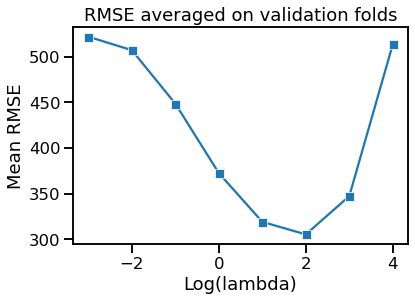

In [595]:
fig, ax = plt.subplots()
sns.lineplot(x = np.log10(alphas), y = cv_scores, marker = 's', ax = ax)
ax.set_xlabel('Log(lambda)')
ax.set_ylabel('Mean RMSE')
ax.set_title('RMSE averaged on validation folds')
plt.show()

Could fine tune:
- But of hyperparameter values tried $\lambda = 100$ is best.

Now we *finally* report results on the true test set:
- We have not fit / optimized on it.
- Have not tuned hyperparameters to see how well it performs on validation folds.

**Test/hold-out set is our true final gold standard**

In [596]:
rr = Ridge(alpha = 100, random_state = 42)
rr.fit(X_train_processed, y_train)

Ridge(alpha=100, random_state=42)

In [597]:
y_pred = rr.predict(X_test_processed)

In [598]:
from sklearn.metrics import mean_squared_error
ridge_RMSE_holdout = np.sqrt(mean_squared_error(y_pred, y_test))
ridge_RMSE_holdout

265.44225908366576

Given the scale of the penguin body mass (g): this is good.

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

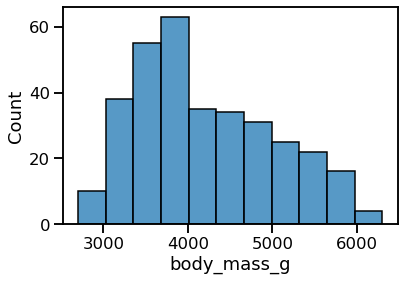

In [368]:
sns.histplot(y)

#### Takeaways of what we just did

- Polynomial model: poor prediction performance.
- L2 regularized the polynomial regression model (Ridge regression) + tuning
- **Much** better test performance than unregularized polynomial model.

But:
    
- Our simple linear model with no polynomial worked well.
- Almost as well as polynomial features
- Think carefully before adding model complexity.

A simple model with less number of good quality predictive features may work as well if not better.

Logical extension:
- Features that are correlated but don't want to throw them away.
- L2 regularized linear model + tuning:
    - don't throw out features.
    - get better test performance than OLS by reducing weight variance.


Sometimes though: throwing away features might work better:
- Learn good features only with high predictive power
- Chuck the rest.

#### L1 Regularization (LASSO)

$$ L = |\textbf{y} - X \textbf{w}|_2^2 + \lambda |\textbf{w}|_1 $$

with $|\textbf{w}|_1 = |w_1| + |w_2| + ... + |w_m|$ as sum of absolute magnitude of the feature weights.

Taxi cab vs Euclidean distance:

<img src = "Images/metrics.png" width = 450/>

Circle in terms of L2 vs L1 distance:

"Circle" in L1:
<img src = "Images/taxcabgeometry.jpg" width = 400/>

General $L^p$ norm:

$$ |\textbf{w}|_P =  \sqrt[p]{|w_1|^p + |w_2|^p + ... + |w_m|^p} $$

"Circles" for different metrics

<img src = "Images/circles.png" width = 400/>

Why use the L1 magnitude $|\textbf{w}|_1$ for regularization?

LASSO encourages model weight sparsity: 
- prefers to drive weights $w_i$ for features with little predictive power to 0.

<img src = "Images/different_metric_regularization.png" width = 600 />

Perform LASSO regression with scikit-learn:

with a general cost function:

In [599]:
from sklearn.linear_model import Lasso

Find the best LASSO model: tune regularization hyperparameter.

In [601]:
alphas = [1, 10, 100, 1e3, 1e4]
cv_lasso_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter = 10000)
    cv_loop_results = cross_validate(
                X=X_train_processed, 
                y=y_train,
                estimator=lasso, 
                cv=10,
                scoring=('neg_mean_squared_error'))
    cv_lasso_scores.append(np.mean(np.sqrt(np.abs(cv_loop_results['test_score']))))

In [602]:
alphas

[1, 10, 100, 1000.0, 10000.0]

In [603]:
cv_lasso_scores

[344.87684564435705,
 301.7613157515692,
 340.2693259123927,
 699.4512087784858,
 811.3632576452586]

The best LASSO model:

In [604]:
lasso_opt = Lasso(alpha=10, random_state=42,  max_iter = 100000)
lasso_opt.fit(X_train_processed, y_train)

y_pred = lasso_opt.predict(X_test_processed) # get final test prediction

In [605]:
lasso_RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
lasso_RMSE

267.37645554658405

In [606]:
ridge_RMSE_holdout

265.44225908366576

Comparable between ridge and LASSO. LASSO tends to have higher weight variance than ridge.

But what's the real difference?

In [532]:
print(rr.coef_)

[  0.          29.32960231   0.8046896   38.17109867  -4.10436699
  40.27228066 -10.86847643  -1.58292157  37.48222572 -14.02382992
  -4.57236431  -5.95361058 -20.50428693  -0.75058332 -24.04661014
 -10.05361186 -10.79395713 -10.65313696  -1.72724584   5.1723557
 -14.20925988   5.06212976  -0.25055749 -17.27288405   0.57708637
 -16.2812928    7.40733877 -20.38843876 -19.91851821   4.7657019
  -5.75859125 -17.85396187   0.47018371   2.37087442 -22.65473387
  23.22926662 -23.72344945 -13.9956209   -3.80574878  -5.11166274
   5.35232607  -8.82144444  -3.60074121  -9.27420928  -2.71133015
  -4.99539005   4.03028956   9.62441097   1.62602145  17.78209921
  10.12563598  12.69525486  16.44364281  14.71106968  13.32988964
   4.32024456  -9.68390238   5.32047154  -0.74803361   1.05694406
  -7.35649966  23.17919449  10.28762348  20.77489205   9.9559688
  13.05856002   0.56126663   4.34217579   5.87326338   7.20871856
   6.7571956   28.89666184   1.20704504  -0.47418842  25.29255039
  18.01999863

In [607]:
lasso_opt.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.69391521e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -5.10132627e+01,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.47906338e+01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

#### Ridge 
When we introduce many features that:
- we believe may all have some predictive power.
- want to heavily penalize weight variance

#### LASSO

We have dataset with many highly correlated features:
- believe many are not actually adding to predictive power.
- willing to cut away marginally unimportant features.


Which is better:
- depends on dataset
- modeling goal 